In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

* rank: Position of the YouTube channel based on the number of subscribers
* Youtuber: Name of the YouTube channel
* subscribers: Number of subscribers to the channel
* video views: Total views across all videos on the channel
* category: Category or niche of the channel
* Title: Title of the YouTube channel
* uploads: Total number of videos uploaded on the channel
* Country: Country where the YouTube channel originates
* Abbreviation: Abbreviation of the country
* channel_type: Type of the YouTube channel (e.g., individual, brand)
* video_views_rank: Ranking of the channel based on total video views
* country_rank: Ranking of the channel based on the number of subscribers within its country
* channel_type_rank: Ranking of the channel based on its type (individual or brand)
* video_views_for_the_last_30_days: Total video views in the last 30 days
* lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
* highest_monthly_earnings: Highest estimated monthly earnings from the channel
* lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
* highest_yearly_earnings: Highest estimated yearly earnings from the channel
* subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
* created_year: Year when the YouTube channel was created
* created_month: Month when the YouTube channel was created
* created_date: Exact date of the YouTube channel’s creation
* Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
* Population: Total population of the country
* Unemployment rate: Unemployment rate in the country
* Urban_population: Percentage of the population living in urban areas
* Latitude: Latitude coordinate of the country’s location
* Longitude: Longitude coordinate of the country’s location

In [2]:
df = pd.read_csv('/Users/shu/netology/files_from_netology/Файлы_к_ДЗ_Классификация_и_кластеризация/Global YouTube Statistics.csv', encoding='unicode_escape')


In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.shape

(995, 28)

In [5]:
# Заменяем пробелы на _ и все переводим к нижнему регистру

df.columns = (i.replace(' ','_') for i in df.columns)
df.columns = df.columns.str.lower()

In [6]:
df.drop('rank', axis=1, inplace=True)

In [7]:
# Есть пропущенные данные 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   youtuber                                 995 non-null    object 
 1   subscribers                              995 non-null    int64  
 2   video_views                              995 non-null    float64
 3   category                                 949 non-null    object 
 4   title                                    995 non-null    object 
 5   uploads                                  995 non-null    int64  
 6   country                                  873 non-null    object 
 7   abbreviation                             873 non-null    object 
 8   channel_type                             965 non-null    object 
 9   video_views_rank                         994 non-null    float64
 10  country_rank                             879 non-n

In [8]:
df.isna().mean().round(2) * 100

youtuber                                    0.0
subscribers                                 0.0
video_views                                 0.0
category                                    5.0
title                                       0.0
uploads                                     0.0
country                                    12.0
abbreviation                               12.0
channel_type                                3.0
video_views_rank                            0.0
country_rank                               12.0
channel_type_rank                           3.0
video_views_for_the_last_30_days            6.0
lowest_monthly_earnings                     0.0
highest_monthly_earnings                    0.0
lowest_yearly_earnings                      0.0
highest_yearly_earnings                     0.0
subscribers_for_last_30_days               34.0
created_year                                1.0
created_month                               1.0
created_date                            

In [9]:
# дублей нет

df.duplicated().sum()

0

Пропущенные значение в основнов в столбце Country и соответственно все, что связанно с этим столбцом, т.е country_rank и Abbreviation и последние 6 столбцов.

Пропущенные значение category, subscribers_for_last_30_days 

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_26336/765024804.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='black')


<Axes: >

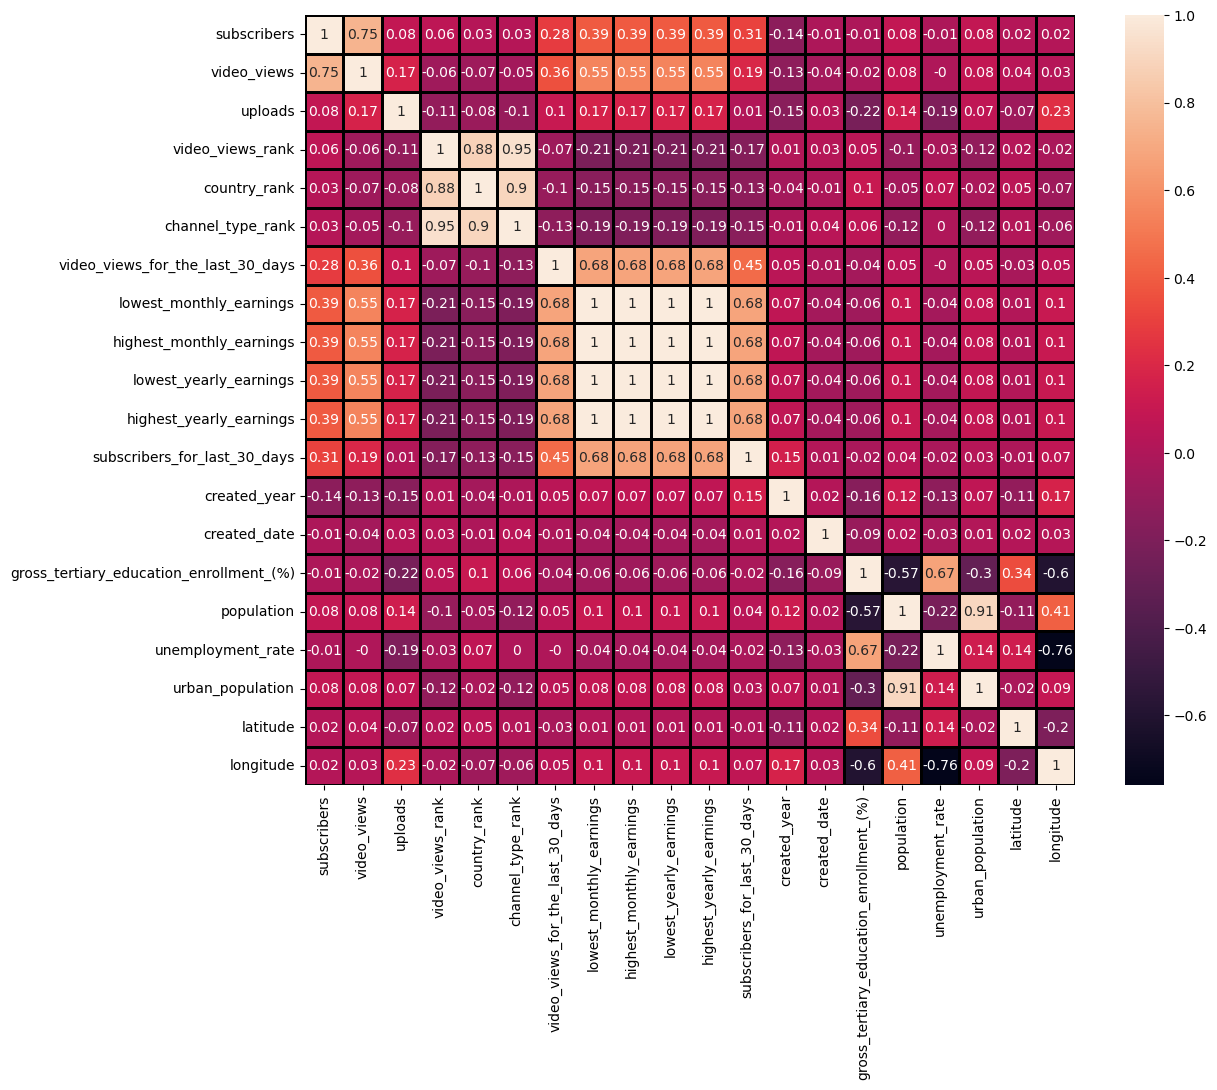

In [10]:
# смотрим на корреляцию данных на тепловой карты

plt.figure(figsize= (13, 10))

sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='black')

* Видим сильную зависимость подписчиков от кол-ва просмотров на видео

* Есть средняя зависимость заработка(любой период заработка имеет одинаковую корреляцию) и кол-во просмотров

* Есть отрицательная средняя зависимость Общая численность населения страны и Процент населения, получившего высшее образование в стране

* Есть значимая зависимость подписчиков за последний месяц и зароботка

* Есть сильная зависимость Рейтинг канала по общему количеству просмотров видео и Рейтинг канала по его типу (отдельный или бренд).

* Есть сильная зависимость Рейтинг канала по общему количеству просмотров видео и Рейтинг канала по количеству подписчиков внутри страны.

## Заполним пропуски

Для категориальных данных мы можем преминить Метод pandas.unique(), он выделит уникальные значения из всего перечня столбцов. Так как у нас нет категориальных значений в датасете df_sample мы заполним числовые переменные. Процесс обработки пропусков можно сократить с помощью sklearn.impute.SimpleImputer.


In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# Создадим список, который будем визуализировать 

sample_col = ['subscribers', 'video_views', 'highest_monthly_earnings', 'highest_yearly_earnings',\
 'lowest_monthly_earnings', 'lowest_yearly_earnings', 'population', 'gross_tertiary_education_enrollment_(%)',\
'subscribers_for_last_30_days', 'video_views_rank', 'channel_type_rank', 'country_rank']

In [13]:
df_sample = df.loc[:, sample_col]

In [14]:
# pd.unique(df_sample.values.ravel()) - в нашем датасете нет категориальных значений
# most_frequent - стратегия "вставить вместо пропуска самое распространенное значение"

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# categorical_columns = []
# df[categorical_columns] = imputer.fit_transform(df[categorical_columns].values)

In [15]:
# Заполняем пропуски с помощью sklearn.impute.SimpleImputer. 
# mean - стратегия "вставить среднее значение"

df_sample_t = df_sample.copy()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
numeric_columns = df_sample_t.columns.to_list()
df_sample_t[numeric_columns] = imputer.fit_transform(df_sample_t[numeric_columns].values)

In [16]:
df_sample_t.isna().any(), '===============================',  df_sample.isna().any()

(subscribers                                False
 video_views                                False
 highest_monthly_earnings                   False
 highest_yearly_earnings                    False
 lowest_monthly_earnings                    False
 lowest_yearly_earnings                     False
 population                                 False
 gross_tertiary_education_enrollment_(%)    False
 subscribers_for_last_30_days               False
 video_views_rank                           False
 channel_type_rank                          False
 country_rank                               False
 dtype: bool,
 '===============================',
 subscribers                                False
 video_views                                False
 highest_monthly_earnings                   False
 highest_yearly_earnings                    False
 lowest_monthly_earnings                    False
 lowest_yearly_earnings                     False
 population                                  True


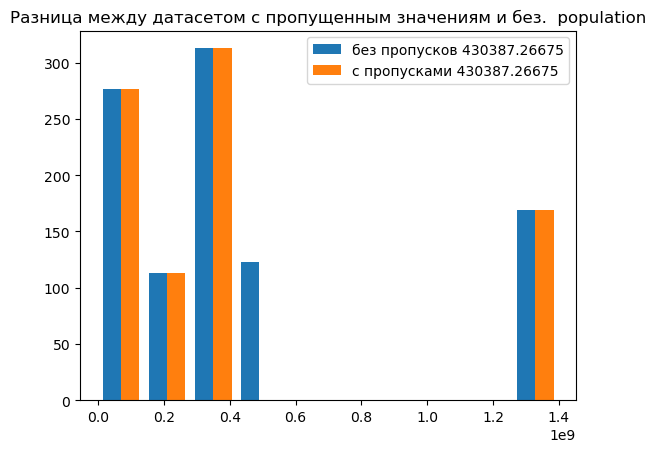

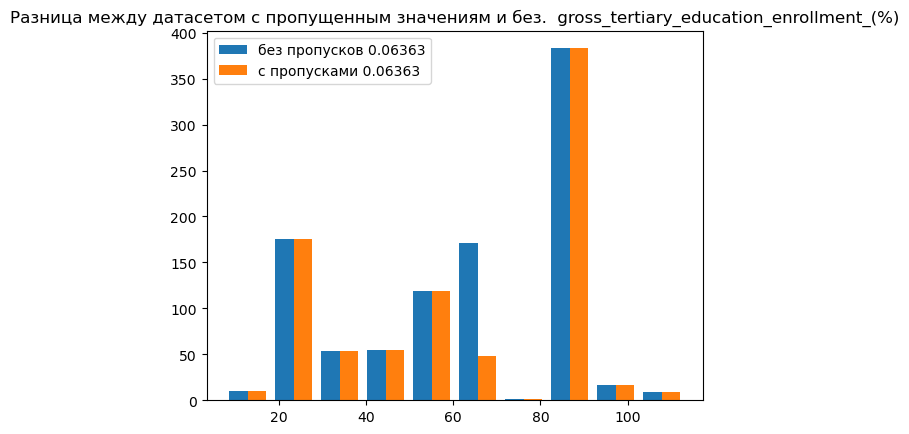

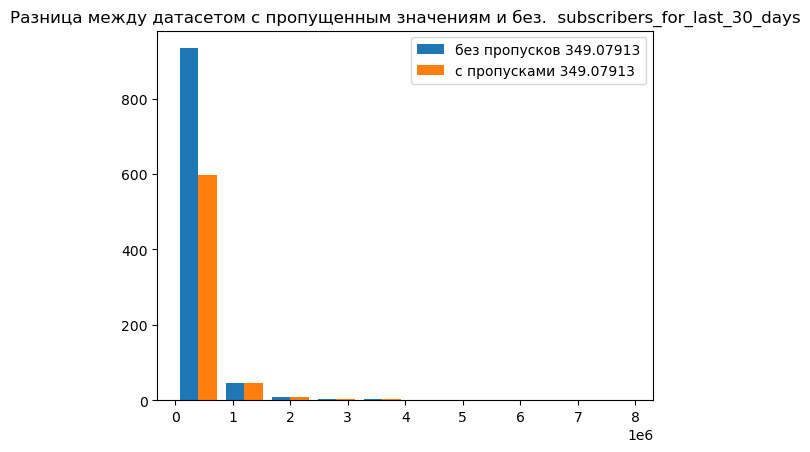

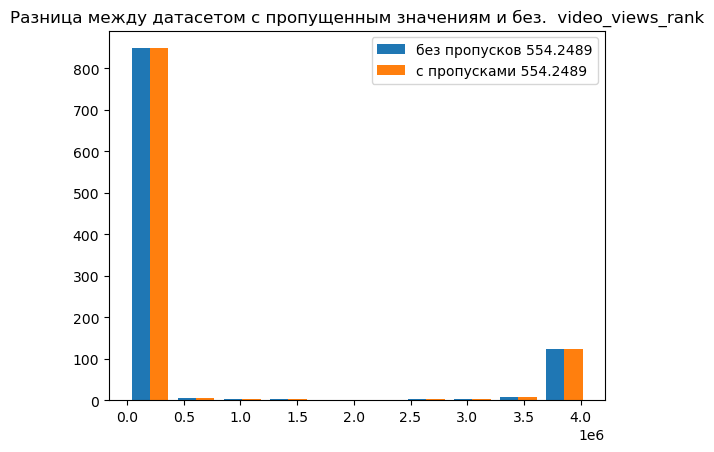

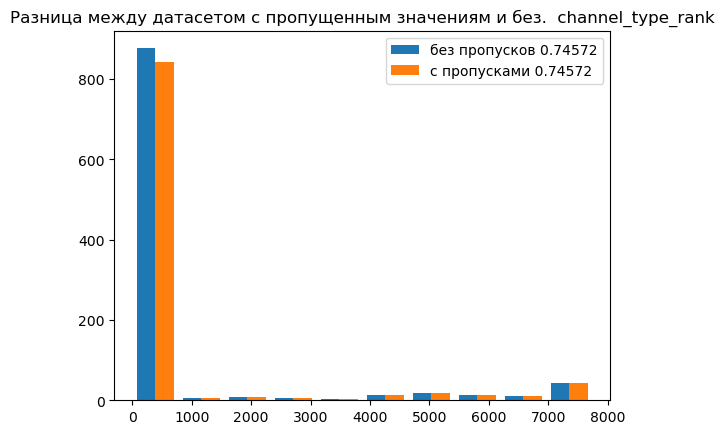

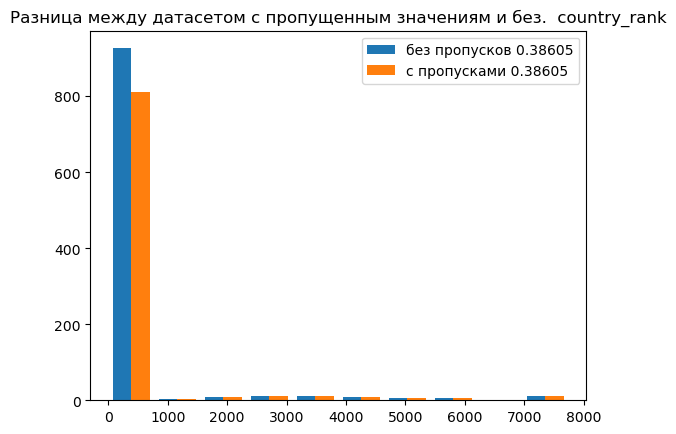

In [17]:
# Изменения не значительные. Можем заменить пропуски в нашем датасете

for col in df_sample_t.iloc[:, 6:].columns:

    plt.hist( [df_sample_t[col], df_sample[col]], stacked=False )
    plt.title(f'Разница между датасетом с пропущенным значениям и без.  {col}')
    plt.legend([f'без пропусков {df_sample_t[col].mean().round(2) / 10**3}', f'с пропусками {df_sample[col].mean().round(2) / 10**3}'])
    plt.show()
    

In [18]:
# Заполняем пропуски

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_numeric = df_sample.columns
df_sample[columns_numeric] = imputer.fit_transform(df_sample[columns_numeric].values) 

<Axes: >

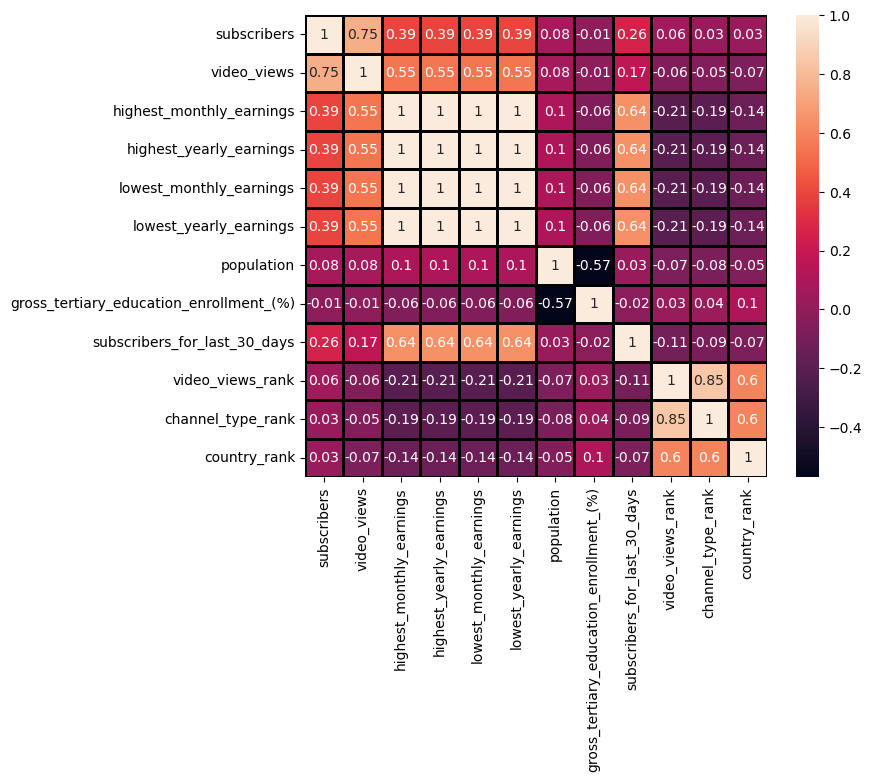

In [19]:
plt.figure(figsize=(7.5,6))
sns.heatmap(df_sample.corr().round(2), annot = True, square = True, linewidths=1, linecolor='black')

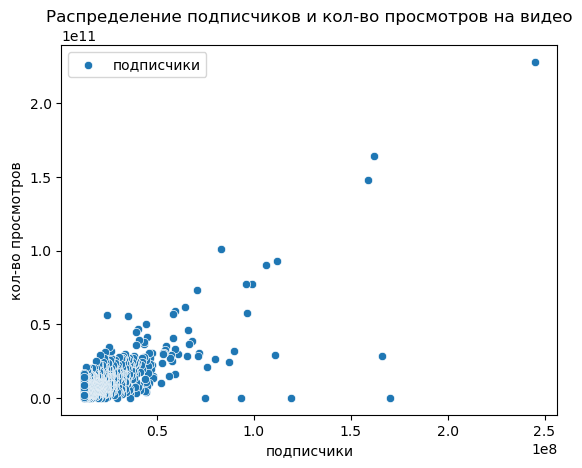

In [20]:
# есть линейная зависимость 

sns.scatterplot(x=df_sample.subscribers, y=df_sample.video_views, data=df_sample)
plt.title('Распределение подписчиков и кол-во просмотров на видео')
plt.xlabel('подписчики')
plt.ylabel('кол-во просмотров')
plt.legend(['подписчики'], loc=2)


Text(0, 0.5, 'Кол-во просмотров')

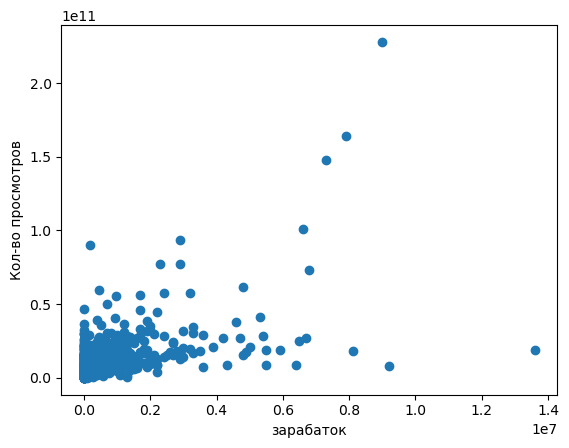

In [21]:
# На графике видно, что после определенного кол-во просмотров активно начинает расти заработк.

plt.scatter(df_sample.highest_monthly_earnings, df_sample.video_views)
plt.xlabel('зарабаток')
plt.ylabel('Кол-во просмотров')

Text(0, 0.5, 'заработок за месяц')

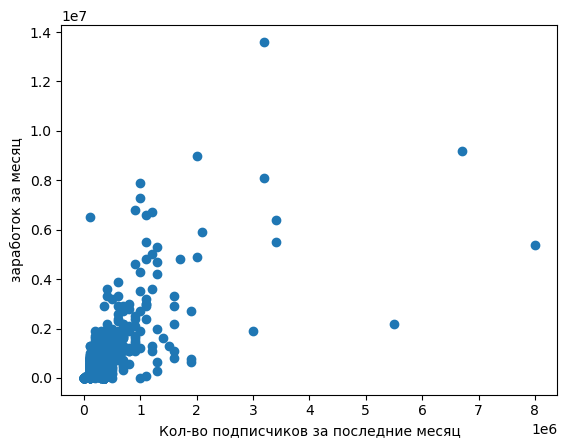

In [22]:
# Зарплата ютубера зависит от кол-ва подписчиков

plt.scatter(df_sample.subscribers_for_last_30_days , df_sample.highest_monthly_earnings)
plt.title('')
plt.xlabel('Кол-во подписчиков за последние месяц')
plt.ylabel('заработок за месяц')

### Задание 2. Корреляционный анализ

* Оставьте два коррелирующих столбца: "subscribers" и"video views".
* Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
* Рассчитайте коэффициент корреляции Пирсона.
* Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
* Разделите выборку на тестовую и тренировочную.
* Постройте модель линейной регрессии.
* Рассчитайте точность модели на тестовой выборке.

Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [23]:
df_sample_2_col = df_sample[['subscribers','video_views']]

In [24]:
df_sample_2_col.head()

,subscribers,video_views
0,245000000.0,2.280000e+11
1,170000000.0,0.000000e+00
2,166000000.0,2.836884e+10
3,162000000.0,1.640000e+11
4,159000000.0,1.480000e+11


In [25]:
df_sample_2_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  995 non-null    float64
 1   video_views  995 non-null    float64
dtypes: float64(2)
memory usage: 15.7 KB


In [26]:
# Есть нулевые просмотры на видео

df_sample_2_col.describe()

,subscribers,video_views
count,9.950000e+02,9.950000e+02
mean,2.298241e+07,1.103954e+10
std,1.752611e+07,1.411084e+10
min,1.230000e+07,0.000000e+00
25%,1.450000e+07,4.288145e+09
50%,1.770000e+07,7.760820e+09
75%,2.460000e+07,1.355470e+10
max,2.450000e+08,2.280000e+11


In [27]:
# Уберем 0 просмотры, по заданию

df_sample_2_col_w_null = df_sample_2_col.loc[df_sample_2_col.video_views != 0]

In [28]:
# Корреляция высокая

df_sample_2_col_w_null.corr(method='pearson')

,subscribers,video_views
subscribers,1.000000,0.824262
video_views,0.824262,1.000000


In [29]:
X = df_sample_2_col_w_null[['video_views']]
y = df_sample_2_col_w_null.subscribers

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
lm.coef_

array([0.00096251])

In [35]:
lm.intercept_

11862410.518592533

In [36]:
pred = lm.predict(X_test)

In [37]:
pred

array([20201416.47254965, 27721634.71448929, 14051160.98078696,
       15037932.93322013, 29387945.89321139, 25258042.59655568,
       14278067.83749483, 36509735.61606601, 38397560.31965908,
       21048854.40982974, 32293515.30056022, 30562313.08864647,
       18995111.44114518, 30112757.78595693, 13572857.02676543,
       15777776.58502978, 16298371.10446949, 31745488.85518774,
       55079884.58783615, 13857759.95971455, 20411714.39878848,
       13376492.23369468, 13312714.12060557, 22727546.85946319,
       11997183.24099794])

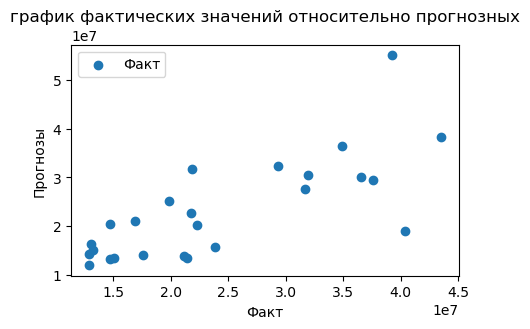

In [38]:
# Смотрим на точечный график фактических значений относительно прогнозных

plt.figure(figsize=(5,3))
plt.scatter(y_test, pred)
plt.title('график фактических значений относительно прогнозных')
plt.ylabel('Прогнозы')
plt.xlabel('Факт')
plt.legend(['Факт'])

In [39]:
# Рассчитываем точность модели на тестовой выборке разными методами
# Коэф точности модели ниже среднего


import sklearn.metrics as metrics

print(f'R2: {metrics.r2_score(y_test, pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred))}')

R2: 0.45980269915268746
MAE: 5286578.825448749
MSE: 50863715946888.17
RMSE: 7131880.253263383


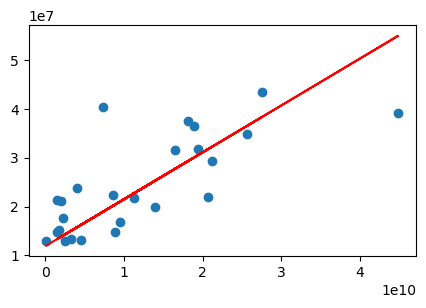

In [40]:
# Смотрим на точность модели

plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='r')

Text(0.5, 1.0, 'График с остатками')

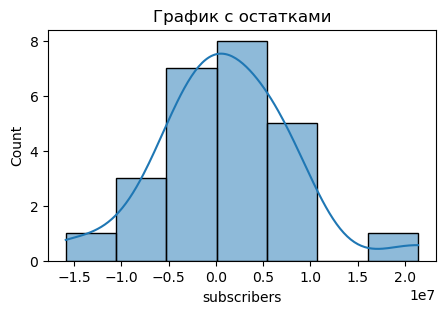

In [41]:
# График с остатками.
# На графике колокол - это хорошо. Значит модель линейной регрессии хорошая

plt.figure(figsize=(5,3))
sns.histplot((y_test-pred), kde=True)
plt.title('График с остатками')


In [42]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты'])

,Коэффициенты
video_views,0.000963


In [43]:
X = df_sample_2_col[['video_views']]
y = df_sample_2_col.subscribers

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)

In [45]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = lm.predict(X_test)

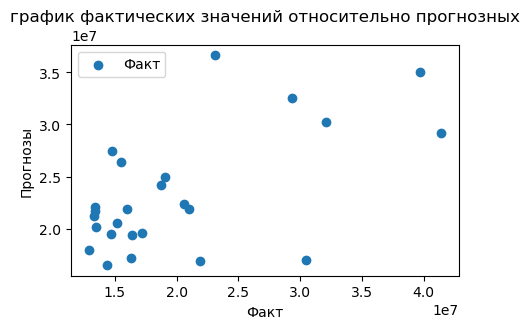

In [47]:
# Смотрим на точечный график фактических значений относительно прогнозных

plt.figure(figsize=(5,3))
plt.scatter(y_test, pred)
plt.title('график фактических значений относительно прогнозных')
plt.ylabel('Прогнозы')
plt.xlabel('Факт')
plt.legend(['Факт'])

In [48]:
# Рассчитываем точность модели на тестовой выборке разными методами
# Коэф точности модели значительно ниже, чем после удалении 0 просмотров из датасета


import sklearn.metrics as metrics

print(f'R2: {metrics.r2_score(y_test, pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred))}')

R2: 0.18657010359015824
MAE: 6118387.260795405
MSE: 52399383903267.42
RMSE: 7238741.87295468


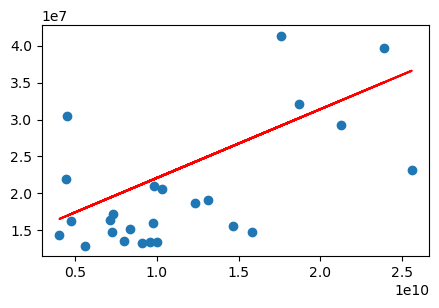

In [49]:
# Смотрим на точность модели

plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='r')

Text(0.5, 1.0, 'График с остатками')

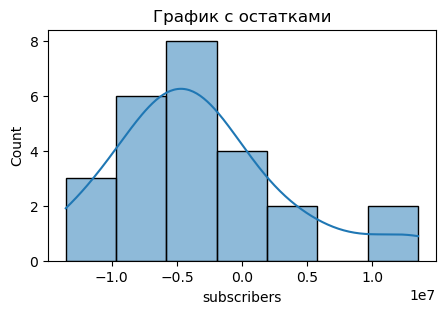

In [50]:
# График с остатками.
# модель линейной регрессии сработал хуже

plt.figure(figsize=(5,3))
sns.histplot((y_test-pred), kde=True)
plt.title('График с остатками')


### Задание 3. Классификация

* Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
* В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
* Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
* Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
* Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
* Постройте модель логистической регрессии.
* Рассчитайте точность модели на тестовой выборке.

*Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?*

##### Требования по оформлению графиков:
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

* Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

In [51]:
# Саммые популярные категории это музыка и развлечение

df.groupby('category').agg({'video_views':'sum'}).sort_values('video_views', ascending=False).head()

,video_views
category,
Music,3.121478e+12
Entertainment,2.527739e+12
People & Blogs,1.265791e+12
Gaming,7.176389e+11
Education,6.966145e+11


In [52]:
# Отфильтровали датафрейм и занесли получившийся результат в новую переменую
# video_views - 0 просмотры имеются у не известных категорий видео или не попали под наши категории

df_sample_3_col = df.loc[ (df.category == 'Music') | (df.category == 'Entertainment'),\
                        ['video_views', 'subscribers', 'uploads', 'category'] ]

In [53]:
# Music = 0, Entertainment = 1

for i, col in enumerate(['Music', 'Entertainment']):

    df_sample_3_col.loc[df_sample_3_col.category == col, 'category'] = i

In [54]:
df_sample_3_col.category.unique()

array([0, 1], dtype=object)

In [55]:
# Скачиваний больше у контента связанный с развлечением, а просмотров больше у музыки. 
# Подписчиков почти одинаковое кол-во

df_sample_3_col.groupby('category').sum()

,video_views,subscribers,uploads
category,,,
0,3.121478e+12,5195000000,471773
1,2.527739e+12,5158200000,2869944


[Text(0.5, 1.0, 'Пропорция кол-ва значений в категориях'),
 Text(0.5, 0, 'категория'),
 Text(0, 0.5, 'Колличество')]

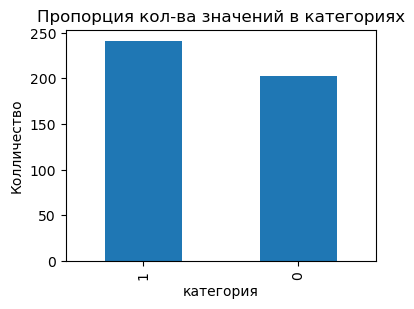

In [56]:
# Пропорции у категорий разные

plt.figure(figsize=(4,3))
df_sample_3_col.category.value_counts().plot(kind='bar').set(title='Пропорция кол-ва значений в категориях',\
                                             xlabel='категория', ylabel='Колличество')


In [57]:
len(df_sample_3_col[df_sample_3_col.category == 0]), len(df_sample_3_col[df_sample_3_col.category == 1])

(202, 241)

In [58]:
# Сокращаем кол-во значений в столбце категория до равного кол-ва значений в категориях
# Если этого не сделать то качество модели снизится

df_sample_3_col.loc[df_sample_3_col.category == 1, 'category'] = df_sample_3_col.loc\
                     [df_sample_3_col.category == 1, 'category'].sample(n=202, random_state=23)



In [59]:
df_sample_3_col.category.isna().any()

True

In [60]:
df_sample_3_col.dropna(inplace=True)

In [61]:
df_sample_3_col.isna().mean() *100

video_views    0.0
subscribers    0.0
uploads        0.0
category       0.0
dtype: float64

In [62]:
len(df_sample_3_col[df_sample_3_col.category == 0]), len(df_sample_3_col[df_sample_3_col.category == 1])

(202, 202)

In [63]:
# category - является объектом, изменим это

df_sample_3_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   video_views  404 non-null    float64
 1   subscribers  404 non-null    int64  
 2   uploads      404 non-null    int64  
 3   category     404 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


In [64]:
df_sample_3_col.category = df_sample_3_col.category.astype('int')

In [65]:
X = df_sample_3_col[['video_views', 'subscribers', 'uploads']]
y = df_sample_3_col.category

In [66]:
# импортируем LogisticRegression

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=13)

In [67]:
log_reg = LogisticRegression()

In [68]:
# обучаем данные

log_reg.fit(X_train, y_train)

LogisticRegression()

In [69]:
# делаем прогноз на тестовой выборке

y_pred = log_reg.predict(X_test)

In [70]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0])

In [71]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix (y_test, y_pred)

In [72]:
cnf_matrix

array([[ 8,  2],
       [ 5, 10]])

Из матрицы путаницы мы видим, что:

* Истинно положительных предсказаний: 8
* Истинно отрицательные прогнозы: 10
* Ложноположительные прогнозы: 5
* Ложноотрицательные прогнозы: 2

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество) 

accuracy_score(y_test, y_pred)

0.72

Мы можем построить кривую ROC (рабочая характеристика приемника), которая отображает процент истинных положительных результатов, предсказанных моделью, поскольку отсечка вероятности прогнозирования снижается с 1 до 0.

Чем выше AUC (площадь под кривой), тем точнее наша модель может предсказывать результаты

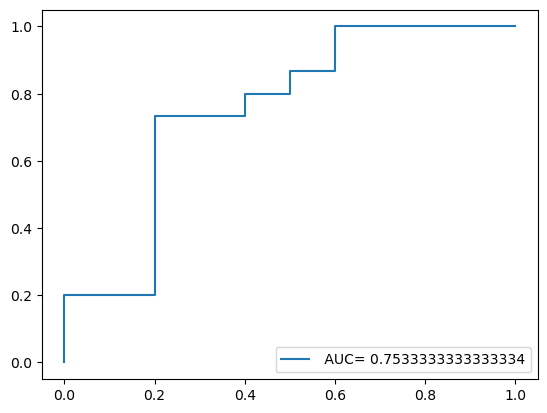

In [75]:
#define metrics

y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr,label=" AUC= " + str(auc))
plt.legend(loc=4)
plt.show()